In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("Data_latih.csv")
df_train["text"] = df_train["judul"].fillna("") + " " + df_train["narasi"].fillna("")
print(df_train.head())

    ID  label    tanggal                                              judul  \
0   71      1  17-Aug-20  Pemakaian Masker Menyebabkan Penyakit Legionna...   
1  461      1  17-Jul-20  Instruksi Gubernur Jateng tentang penilangan  ...   
2  495      1  13-Jul-20  Foto Jim Rohn: Jokowi adalah presiden terbaik ...   
3  550      1   8-Jul-20  ini bukan politik, tapi kenyataan Pak Jokowi b...   
4  681      1  24-Jun-20       Foto Kadrun kalo lihat foto ini panas dingin   

                                              narasi nama file gambar  \
0  A caller to a radio talk show recently shared ...           71.jpg   
1  Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...          461.png   
2  Jokowi adalah presiden terbaik dlm sejarah ban...          495.png   
3  Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...          550.png   
4        Kadrun kalo lihat foto ini panas dingin . .          681.jpg   

                                                text  
0  Pemakaian Masker Menyebabkan

In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    df_train["text"], df_train["label"],
    test_size=0.2, stratify=df_train["label"], random_state=42
)

In [4]:
stopwords_ind = ["yang","dan","di","ke","dari","ini","itu","pada","untuk", ...] 

tfidf = TfidfVectorizer(stop_words=stopwords_ind)
# 3. TF-IDF vectorizer dengan custom stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=8000,
    ngram_range=(1,2),
    stop_words=stopwords_ind,
    lowercase=True
)

In [5]:
X_tr = tfidf.fit_transform(X_train)
X_va = tfidf.transform(X_val)

In [6]:
model = ComplementNB(alpha=0.5)
model.fit(X_tr, y_train)

ComplementNB(alpha=0.5)

In [7]:
y_pred = model.predict(X_va)
print("Accuracy :", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=["Real","Fake"]))

Accuracy : 0.8016528925619835
              precision    recall  f1-score   support

        Real       0.44      0.33      0.38       153
        Fake       0.86      0.90      0.88       694

    accuracy                           0.80       847
   macro avg       0.65      0.62      0.63       847
weighted avg       0.78      0.80      0.79       847



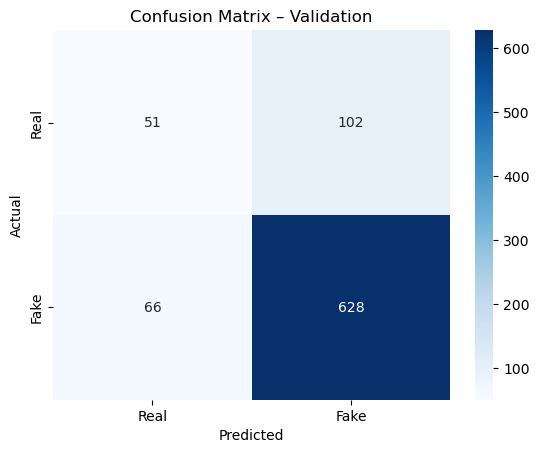

In [8]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Real","Fake"],
            yticklabels=["Real","Fake"])
plt.title("Confusion Matrix – Validation")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()

In [9]:
df_uji = pd.read_csv("Data_uji.csv")  
df_uji["text"] = df_uji["judul"].fillna("") + " " + df_uji["narasi"].fillna("")

X_uji = tfidf.transform(df_uji["text"])
df_uji["prediksi_label"] = model.predict(X_uji)

In [10]:
df_uji = pd.read_csv("Data_uji.csv")  
df_uji["text"] = df_uji["judul"].fillna("") + " " + df_uji["narasi"].fillna("")

X_uji = tfidf.transform(df_uji["text"])
df_uji["prediksi_label"] = model.predict(X_uji)

In [11]:
df_uji[["ID","prediksi_label"]].to_csv("hasil_prediksi.csv", index=False)
print("Hasil prediksi tersimpan di 'hasil_prediksi.csv'")

Hasil prediksi tersimpan di 'hasil_prediksi.csv'


In [12]:
# Membaca hasil prediksi
hasil = pd.read_csv("hasil_prediksi.csv")

# Menampilkan jumlah prediksi untuk masing-masing label
label_counts = hasil["prediksi_label"].value_counts()
print("Jumlah prediksi untuk masing-masing label:")
print(label_counts)
print("\nLabel 0: Real, Label 1: Fake")
if label_counts[1] > label_counts[0]:
    print("Lebih banyak prediksi Fake.")
elif label_counts[1] < label_counts[0]:
    print("Lebih banyak prediksi Real.")
else:
    print("Jumlah prediksi Fake dan Real sama.")

# Evaluasi model pada data validasi
print("\nEvaluasi model pada data validasi:")
print("Accuracy :", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=["Real","Fake"]))

Jumlah prediksi untuk masing-masing label:
prediksi_label
1    397
0     73
Name: count, dtype: int64

Label 0: Real, Label 1: Fake
Lebih banyak prediksi Fake.

Evaluasi model pada data validasi:
Accuracy : 0.8016528925619835
              precision    recall  f1-score   support

        Real       0.44      0.33      0.38       153
        Fake       0.86      0.90      0.88       694

    accuracy                           0.80       847
   macro avg       0.65      0.62      0.63       847
weighted avg       0.78      0.80      0.79       847



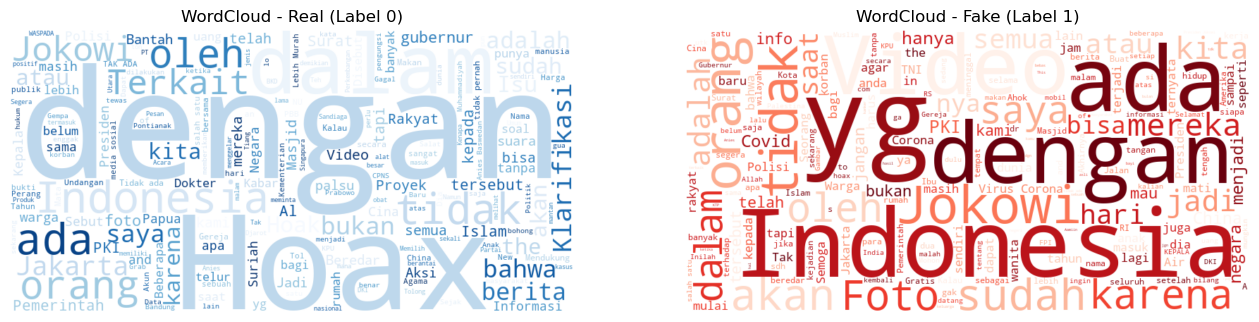

In [13]:
from wordcloud import WordCloud

# Mendefinisikan real_text dan fake_text dari data validasi
real_text = " ".join(X_val[y_val == 0])
fake_text = " ".join(X_val[y_val == 1])

# Membuat stopwords_clean dari stopwords_ind
stopwords_clean = set([w for w in stopwords_ind if isinstance(w, str)])

# Filter stopwords to only include strings
stopwords_clean_fixed = {w for w in stopwords_clean if isinstance(w, str)}

wc_real = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text)
wc_fake = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real (Label 0)')

plt.subplot(1,2,2)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake (Label 1)')

plt.show()

Logistic Regression Accuracy: 0.8311688311688312
              precision    recall  f1-score   support

        Real       0.73      0.10      0.18       153
        Fake       0.83      0.99      0.91       694

    accuracy                           0.83       847
   macro avg       0.78      0.55      0.54       847
weighted avg       0.81      0.83      0.78       847



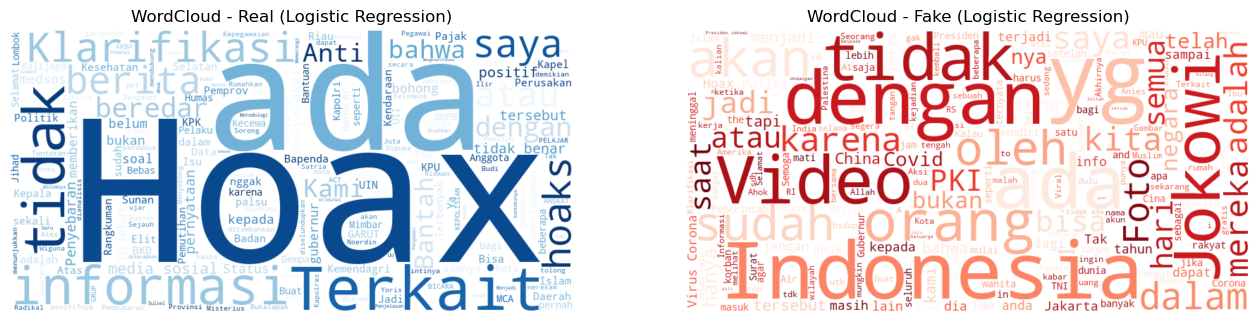

Random Forest Accuracy: 0.846517119244392
              precision    recall  f1-score   support

        Real       0.72      0.25      0.37       153
        Fake       0.86      0.98      0.91       694

    accuracy                           0.85       847
   macro avg       0.79      0.61      0.64       847
weighted avg       0.83      0.85      0.81       847



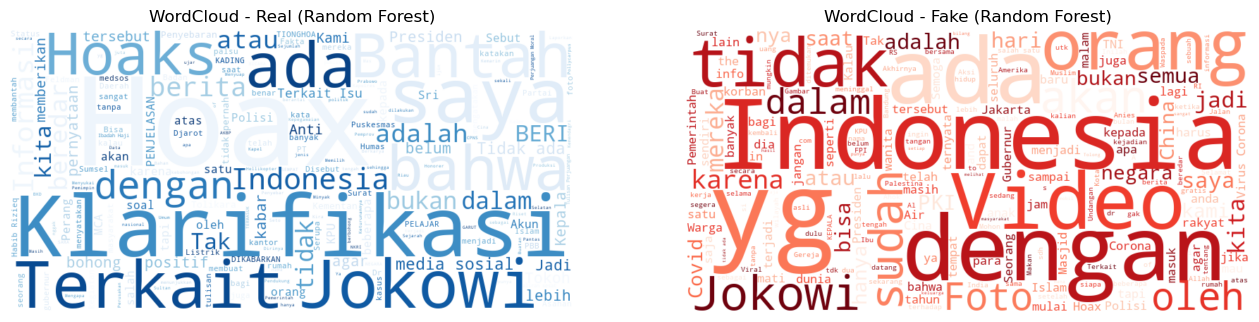

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_tr, y_train)
y_pred_logreg = logreg.predict(X_va)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_logreg))
print(classification_report(y_val, y_pred_logreg, target_names=["Real", "Fake"]))

# WordCloud Logistic Regression
real_text_logreg = " ".join(X_val[y_pred_logreg == 0])
fake_text_logreg = " ".join(X_val[y_pred_logreg == 1])
wc_real_logreg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text_logreg)
wc_fake_logreg = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text_logreg)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wc_real_logreg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real (Logistic Regression)')

plt.subplot(1,2,2)
plt.imshow(wc_fake_logreg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake (Logistic Regression)')
plt.show()

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_tr, y_train)
y_pred_rf = rf.predict(X_va)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf, target_names=["Real", "Fake"]))

# WordCloud Random Forest
real_text_rf = " ".join(X_val[y_pred_rf == 0])
fake_text_rf = " ".join(X_val[y_pred_rf == 1])
wc_real_rf = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text_rf)
wc_fake_rf = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text_rf)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(wc_real_rf, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Real (Random Forest)')

plt.subplot(1,2,2)
plt.imshow(wc_fake_rf, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Fake (Random Forest)')
plt.show()

In [15]:
# Prediksi Data_uji.csv dengan model Logistic Regression
df_uji_logreg = pd.read_csv("Data_uji.csv")
df_uji_logreg["text"] = df_uji_logreg["judul"].fillna("") + " " + df_uji_logreg["narasi"].fillna("")
X_uji_logreg = tfidf.transform(df_uji_logreg["text"])
df_uji_logreg["prediksi_label_logreg"] = logreg.predict(X_uji_logreg)
df_uji_logreg[["ID", "prediksi_label_logreg"]].to_csv("hasil_prediksi_logreg.csv", index=False)
print("Hasil prediksi Logistic Regression tersimpan di 'hasil_prediksi_logreg.csv'")

# Prediksi Data_uji.csv dengan model Random Forest
df_uji_rf = pd.read_csv("Data_uji.csv")
df_uji_rf["text"] = df_uji_rf["judul"].fillna("") + " " + df_uji_rf["narasi"].fillna("")
X_uji_rf = tfidf.transform(df_uji_rf["text"])
df_uji_rf["prediksi_label_rf"] = rf.predict(X_uji_rf)
df_uji_rf[["ID", "prediksi_label_rf"]].to_csv("hasil_prediksi_rf.csv", index=False)
print("Hasil prediksi Random Forest tersimpan di 'hasil_prediksi_rf.csv'")

Hasil prediksi Logistic Regression tersimpan di 'hasil_prediksi_logreg.csv'
Hasil prediksi Random Forest tersimpan di 'hasil_prediksi_rf.csv'


Hasil prediksi semua model tersimpan di 'hasil_prediksi_semua.csv'


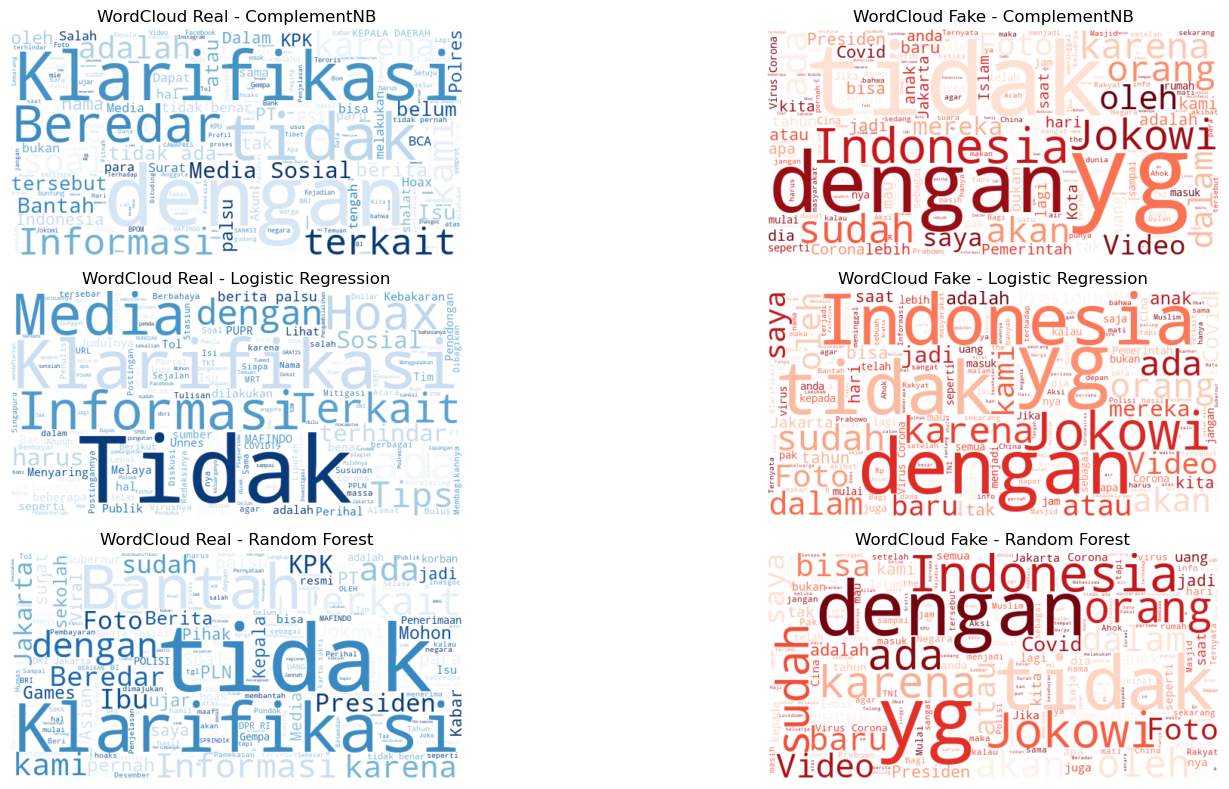

Akurasi pada data validasi:
ComplementNB: 0.8016528925619835
Logistic Regression: 0.8311688311688312
Random Forest: 0.846517119244392


In [16]:
from wordcloud import WordCloud

# Prediksi Data_uji.csv dengan semua model: ComplementNB, Logistic Regression, dan Random Forest
df_uji_all = pd.read_csv("Data_uji.csv")
df_uji_all["text"] = df_uji_all["judul"].fillna("") + " " + df_uji_all["narasi"].fillna("")
X_uji_all = tfidf.transform(df_uji_all["text"])

# ComplementNB
df_uji_all["prediksi_nb"] = model.predict(X_uji_all)
# Logistic Regression
df_uji_all["prediksi_logreg"] = logreg.predict(X_uji_all)
# Random Forest
df_uji_all["prediksi_rf"] = rf.predict(X_uji_all)

# Simpan hasil prediksi
df_uji_all[["ID", "prediksi_nb", "prediksi_logreg", "prediksi_rf"]].to_csv("hasil_prediksi_semua.csv", index=False)
print("Hasil prediksi semua model tersimpan di 'hasil_prediksi_semua.csv'")

# WordCloud untuk masing-masing model

plt.figure(figsize=(18, 8))

# ComplementNB
real_text_nb = " ".join(df_uji_all.loc[df_uji_all["prediksi_nb"] == 0, "text"])
fake_text_nb = " ".join(df_uji_all.loc[df_uji_all["prediksi_nb"] == 1, "text"])
wc_real_nb = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text_nb)
wc_fake_nb = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text_nb)

plt.subplot(3,2,1)
plt.imshow(wc_real_nb, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Real - ComplementNB')
plt.subplot(3,2,2)
plt.imshow(wc_fake_nb, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Fake - ComplementNB')

# Logistic Regression
real_text_logreg_uji = " ".join(df_uji_all.loc[df_uji_all["prediksi_logreg"] == 0, "text"])
fake_text_logreg_uji = " ".join(df_uji_all.loc[df_uji_all["prediksi_logreg"] == 1, "text"])
wc_real_logreg_uji = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text_logreg_uji)
wc_fake_logreg_uji = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text_logreg_uji)

plt.subplot(3,2,3)
plt.imshow(wc_real_logreg_uji, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Real - Logistic Regression')
plt.subplot(3,2,4)
plt.imshow(wc_fake_logreg_uji, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Fake - Logistic Regression')

# Random Forest
real_text_rf_uji = " ".join(df_uji_all.loc[df_uji_all["prediksi_rf"] == 0, "text"])
fake_text_rf_uji = " ".join(df_uji_all.loc[df_uji_all["prediksi_rf"] == 1, "text"])
wc_real_rf_uji = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Blues').generate(real_text_rf_uji)
wc_fake_rf_uji = WordCloud(width=600, height=300, background_color='white', stopwords=stopwords_clean_fixed, colormap='Reds').generate(fake_text_rf_uji)

plt.subplot(3,2,5)
plt.imshow(wc_real_rf_uji, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Real - Random Forest')
plt.subplot(3,2,6)
plt.imshow(wc_fake_rf_uji, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Fake - Random Forest')

plt.tight_layout()
plt.show()

# Akurasi pada data validasi (karena Data_uji.csv tidak punya label)
print("Akurasi pada data validasi:")
print("ComplementNB:", accuracy_score(y_val, y_pred))
print("Logistic Regression:", accuracy_score(y_val, y_pred_logreg))
print("Random Forest:", accuracy_score(y_val, y_pred_rf))

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ComplementNBayes
acc_nb = accuracy_score(y_val, y_pred)
prec_nb = precision_score(y_val, y_pred)
rec_nb = recall_score(y_val, y_pred)
f1_nb = f1_score(y_val, y_pred)

# Logistic Regression
acc_logreg = accuracy_score(y_val, y_pred_logreg)
prec_logreg = precision_score(y_val, y_pred_logreg)
rec_logreg = recall_score(y_val, y_pred_logreg)
f1_logreg = f1_score(y_val, y_pred_logreg)

# Random Forest
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

print("ComplementNB:")
print(f"  Accuracy : {acc_nb:.4f}")
print(f"  Precision: {prec_nb:.4f}")
print(f"  Recall   : {rec_nb:.4f}")
print(f"  F1-score : {f1_nb:.4f}\n")

print("Logistic Regression:")
print(f"  Accuracy : {acc_logreg:.4f}")
print(f"  Precision: {prec_logreg:.4f}")
print(f"  Recall   : {rec_logreg:.4f}")
print(f"  F1-score : {f1_logreg:.4f}\n")

print("Random Forest:")
print(f"  Accuracy : {acc_rf:.4f}")
print(f"  Precision: {prec_rf:.4f}")
print(f"  Recall   : {rec_rf:.4f}")
print(f"  F1-score : {f1_rf:.4f}")

print(".")

ComplementNB:
  Accuracy : 0.8017
  Precision: 0.8603
  Recall   : 0.9049
  F1-score : 0.8820

Logistic Regression:
  Accuracy : 0.8312
  Precision: 0.8339
  Recall   : 0.9914
  F1-score : 0.9059

Random Forest:
  Accuracy : 0.8465
  Precision: 0.8552
  Recall   : 0.9784
  F1-score : 0.9126
.


In [ ]:
print("end")